In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
from datetime import timedelta
import pandas_ta as ta

from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
start = start = dt.datetime(1999,1,1)
end = dt.datetime.now()
days = 14
ticker = 'SPY'  


In [3]:
df = yf.download(ticker,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-04,123.375000,125.218750,121.718750,123.031250,79.169899,9450400
1999-01-05,122.937500,124.875000,122.937500,124.437500,80.074852,8031000
1999-01-06,125.812500,127.750000,125.750000,127.437500,82.005333,7737700
1999-01-07,126.375000,127.218750,125.781250,126.812500,81.603096,5504900
1999-01-08,128.187500,128.500000,125.968750,127.750000,82.206398,6224400
...,...,...,...,...,...,...
2023-08-18,433.369995,437.570007,433.010010,436.500000,436.500000,98758400
2023-08-21,437.549988,440.109985,435.320007,439.339996,439.339996,68719000
2023-08-22,441.179993,441.179993,437.570007,438.149994,438.149994,65062900


In [5]:
del df['Adj Close']

df['Range'] = abs(df['High']-df['Low'])
df['RSI 14'] = ta.rsi(df['Close'], 14)
df['SMA 20'] = ta.rsi(df['Close'], 20)
df['SMA 50'] = ta.rsi(df['Close'], 50)

In [6]:
df

,Open,High,Low,Close,Volume,Range,RSI 14,SMA 20,SMA 50
Date,,,,,,,,,
1999-01-04,123.375000,125.218750,121.718750,123.031250,9450400,3.500000,NaN,NaN,NaN
1999-01-05,122.937500,124.875000,122.937500,124.437500,8031000,1.937500,NaN,NaN,NaN
1999-01-06,125.812500,127.750000,125.750000,127.437500,7737700,2.000000,NaN,NaN,NaN
1999-01-07,126.375000,127.218750,125.781250,126.812500,5504900,1.437500,NaN,NaN,NaN
1999-01-08,128.187500,128.500000,125.968750,127.750000,6224400,2.531250,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-08-18,433.369995,437.570007,433.010010,436.500000,98758400,4.559998,35.283750,41.816981,51.956753
2023-08-21,437.549988,440.109985,435.320007,439.339996,68719000,4.789978,40.887683,45.349906,53.027081
2023-08-22,441.179993,441.179993,437.570007,438.149994,65062900,3.609985,39.350095,44.167020,52.526736


In [7]:
# create 'Tomorrow' column
# it's the 'Close' value from the previous day
# will be used to create a target
df['Tomorrow'] = df['Close'].shift(-1)

In [8]:
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)
df

,Open,High,Low,Close,Volume,Range,RSI 14,SMA 20,SMA 50,Tomorrow,Target
Date,,,,,,,,,,,
1999-01-04,123.375000,125.218750,121.718750,123.031250,9450400,3.500000,NaN,NaN,NaN,124.437500,1
1999-01-05,122.937500,124.875000,122.937500,124.437500,8031000,1.937500,NaN,NaN,NaN,127.437500,1
1999-01-06,125.812500,127.750000,125.750000,127.437500,7737700,2.000000,NaN,NaN,NaN,126.812500,0
1999-01-07,126.375000,127.218750,125.781250,126.812500,5504900,1.437500,NaN,NaN,NaN,127.750000,1
1999-01-08,128.187500,128.500000,125.968750,127.750000,6224400,2.531250,NaN,NaN,NaN,126.531250,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-18,433.369995,437.570007,433.010010,436.500000,98758400,4.559998,35.283750,41.816981,51.956753,439.339996,1
2023-08-21,437.549988,440.109985,435.320007,439.339996,68719000,4.789978,40.887683,45.349906,53.027081,438.149994,0
2023-08-22,441.179993,441.179993,437.570007,438.149994,65062900,3.609985,39.350095,44.167020,52.526736,443.029999,1


In [26]:
# remove data from before 2000
# removes rows that may contain empty indicator data
df = df.loc['2000-01-01':].copy()
df

,Open,High,Low,Close,Volume,Range,RSI 14,SMA 20,SMA 50,Tomorrow,Target
Date,,,,,,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,8164300,4.375000,60.123229,60.347389,57.217709,139.750000,0
2000-01-04,143.531250,144.062500,139.640625,139.750000,8089800,4.421875,39.912317,45.551217,51.600091,140.000000,1
2000-01-05,139.937500,141.531250,137.250000,140.000000,12177900,4.281250,40.853504,46.161983,51.812294,137.750000,0
2000-01-06,139.625000,141.500000,137.750000,137.750000,6227200,3.750000,35.468775,41.727638,49.806846,145.750000,1
2000-01-07,140.312500,145.750000,140.062500,145.750000,8066500,5.687500,57.113342,57.137699,55.987519,146.250000,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-18,433.369995,437.570007,433.010010,436.500000,98758400,4.559998,35.283750,41.816981,51.956753,439.339996,1
2023-08-21,437.549988,440.109985,435.320007,439.339996,68719000,4.789978,40.887683,45.349906,53.027081,438.149994,0
2023-08-22,441.179993,441.179993,437.570007,438.149994,65062900,3.609985,39.350095,44.167020,52.526736,443.029999,1


In [10]:
# loop through dataframe and add all features to a list
# removes 'Tomorrow' and 'Target' column from the list 
def get_features(dataframe):
    features = []
    for column in dataframe:
        features.append(column)
    
    features.pop(-1)
    features.pop(-1)
    
    return features


In [11]:
features = get_features(df)

In [12]:
# n_estimators = number of decision trees
# min_samples_split = higher it is set, the less accurtate it is, the less it will overfit
model = RandomForestClassifier(n_estimators=300, min_samples_split=100, random_state=1)

train = df.iloc[:-100]
test = df.iloc[-100:]


model.fit(train[features], train['Target'])


RandomForestClassifier(min_samples_split=100, n_estimators=300, random_state=1)

In [13]:
predictions = model.predict(test[features])

In [19]:
predictions_series = pd.Series(predictions, index=test.index)
predictions_series

Date
2023-04-03    1
2023-04-04    0
2023-04-05    1
2023-04-06    0
2023-04-10    1
             ..
2023-08-18    1
2023-08-21    1
2023-08-22    0
2023-08-23    0
2023-08-24    1
Length: 100, dtype: int32

In [17]:
precision_score(test['Target'], predictions)

0.46774193548387094

In [20]:
combined = pd.concat([test['Target'], predictions_series], axis=1)

<Axes: xlabel='Date'>

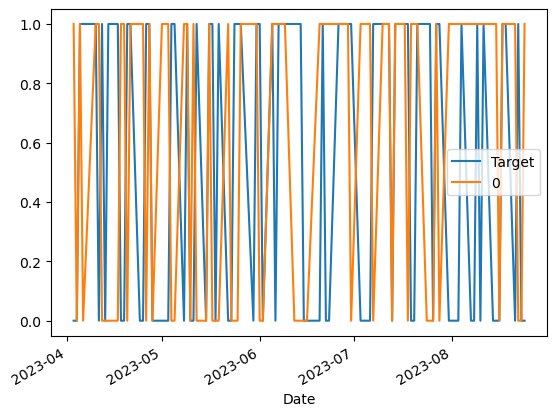

In [21]:
combined.plot()

In [23]:
print("Classification Report")
print(classification_report(test['Target'], predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.37      0.30      0.33        47
           1       0.47      0.55      0.50        53

    accuracy                           0.43       100
   macro avg       0.42      0.42      0.42       100
weighted avg       0.42      0.43      0.42       100



In [24]:
importances = model.feature_importances_
importances

array([0.09291609, 0.09108011, 0.08907027, 0.09279225, 0.14120956,
       0.12269085, 0.12400386, 0.1131663 , 0.1330707 ])